###  Data Preparation Urdu
In this file, we prepare the Urdu-language dataset for emotion analysis. We used te dataset from the paper. We analyze how emotions and speakers are distributed within the dataset

* Input: Audio files in the Urdu language
* Output: A structured dataframe containing: Categories (emotion labels), Speaker ID (unique identifier for each speaker), Data path (file path to the corresponding audio files), valence (positive/negative emotion)

In [1]:
# dependencies
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the dataset directory
urdu_path = r"..\Data\Urdu"

In [3]:
data = []

# Iterate through the emotions
for emotion in os.listdir(urdu_path):
    emotion_path = os.path.join(urdu_path, emotion)
    if os.path.isdir(emotion_path):
        for filename in os.listdir(emotion_path):
            file_path = os.path.join(emotion_path, filename)
            if os.path.isfile(file_path):
                parts = filename.split('_')
                if len(parts) == 3 and re.match(r"S[MF]\d{1,2}", parts[0]):
                    if "M" in parts[0]:
                        speaker_id = int(parts[0][2:]) + 11
                    else:
                        speaker_id = int(parts[0][2:])  # Extracts X (1 or 2 digits after gender)
                    data.append([file_path, emotion, speaker_id])

In [4]:
# Create a DataFrame
df = pd.DataFrame(data, columns=['filename', 'emotion', 'speaker_id'])


In [5]:
# counts of speakers
df["speaker_id"].nunique()

29

In [6]:
# speaker distribution
speaker_distribution = df["speaker_id"].value_counts()
speaker_distribution


speaker_id
16    80
15    48
36    40
35    38
13    28
18    28
12    22
6     14
17    14
1     12
14    12
31    10
7      6
34     6
11     4
38     4
9      4
4      4
5      4
32     4
2      2
28     2
8      2
3      2
29     2
30     2
10     2
33     2
37     2
Name: count, dtype: int64

Speakers are missing; we do not have 38 as stated in the paper, and the number of samples per speaker varies significantly.

C:\Users\david\AppData\Local\Temp\ipykernel_21052\2389859790.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


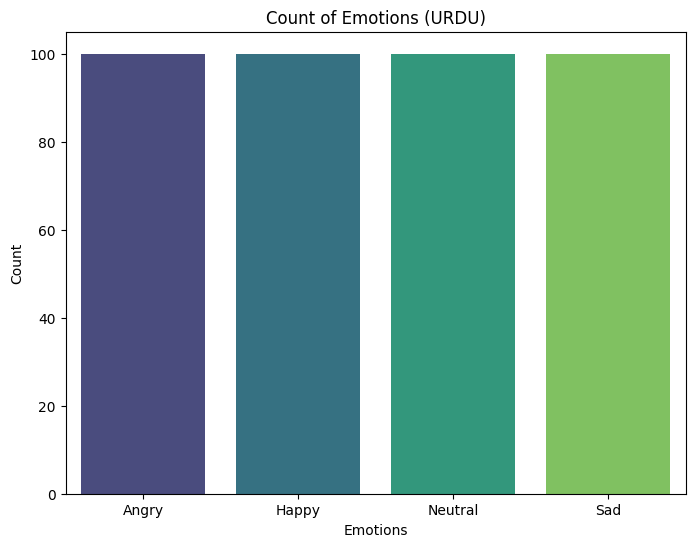

In [7]:
# Count occurrences of each emotion
emotion_counts = df['emotion'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.title("Count of Emotions (URDU)")
plt.show()

This chart shows how many times each emotion appears in the urdu dataset. All emotions occur the same number of times.

In [ ]:
# Encoding labels to 0 and 1
# Mapping dictionary
# posittive: 1
# negative. 0
emotion_map = {
    'Happy': 1,
    'Neutral': 1,
    'Sad': 0,
    'Angry': 0
}

In [9]:
# Map emotions to Positive/Negative
df['valence'] = df['emotion'].map(emotion_map)

We mapped positive and negative valence exactly as described in the original paper.
Emotion detection is a complex and nuanced topic, and reducing it solely to valence (positive/negative) is undeniably reductive — and we fully acknowledge that. However, we adopted this approach in order to replicate the original study.
Binary valence labels are also quite common in emotion mapping, especially as a starting point.
Nonetheless, this limitation will be explicitly addressed in the outlook section.


In [10]:
df

,filename,emotion,speaker_id,valence
0,..\Data\Urdu\Angry\SM1_F10_A010.wav,Angry,12,0
1,..\Data\Urdu\Angry\SM1_F11_A011.wav,Angry,12,0
2,..\Data\Urdu\Angry\SM1_F12_A012.wav,Angry,12,0
3,..\Data\Urdu\Angry\SM1_F13_A013.wav,Angry,12,0
4,..\Data\Urdu\Angry\SM1_F14_A014.wav,Angry,12,0
...,...,...,...,...
395,..\Data\Urdu\Sad\SM27_F4_S096.wav,Sad,38,0
396,..\Data\Urdu\Sad\SM6_F1_S097.wav,Sad,17,0
397,..\Data\Urdu\Sad\SM6_F2_S098.wav,Sad,17,0
398,..\Data\Urdu\Sad\SM6_F3_S099.wav,Sad,17,0


In [11]:
# save the data as csv
df.to_csv("../Data/Urdu/data_path_urdu.csv",index=False)

df.head()

,filename,emotion,speaker_id,valence
0,..\Data\Urdu\Angry\SM1_F10_A010.wav,Angry,12,0
1,..\Data\Urdu\Angry\SM1_F11_A011.wav,Angry,12,0
2,..\Data\Urdu\Angry\SM1_F12_A012.wav,Angry,12,0
3,..\Data\Urdu\Angry\SM1_F13_A013.wav,Angry,12,0
4,..\Data\Urdu\Angry\SM1_F14_A014.wav,Angry,12,0
